# Лабораторне заняття №7

# Перетворення випадкових величин
На цьому занятті ми реалізуємо перетворення випадкових величин із розглянутих раніше розподілів, які реалізовані в бібліотеці [SciPy](https://docs.scipy.org/doc/scipy/reference/).
Із цього пакету будемо використовувати клас [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html), в якому реалізована велика кількість імовірнісних розподілів і статистичних функцій.

Для візуалізації використаємо бібліотеку [Matplotlib](https://matplotlib.org/).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1 Квантильне перетворення

Справедливі два твердження про квантильне перетворення:
1. Нехай випадкова величина $\xi$ має неперервну функцію розподілу $F$.
Тоді випадкова величина $\eta = F(\xi)$ має стандартний рівномірний розподіл:
$F(\xi) \sim Unif(0, 1)$.
2. Нехай $F$ - неперервна функція розподілу,
випадкова величина $\eta$ має стандартний рівномірний розподіл: $\eta \sim Unif(0, 1)$.
Тоді випадкова величина $\xi = F^{-1}(\eta)$ має функцію розподілу $F$.

### 1.1 Експоненційний розподіл

Реалізуйте перше твердження про квантильне перетворення для випадкової величини $\xi \sim Exp(1)$:
- згенеруйте $n = 10000$ значень випадкової величини $\xi$;
- отримайте $n = 10000$ значень випадкової величини $F(\xi)$;
- намалюйте нормовану гістограму отриманих $n = 10000$ значень випадкової величини $F(\xi)$;
- намалюйте щільність стандартного рівномірного розподілу на тому ж графіку.

Порівняйте форму нормованої гістограми та функції щільності.

Що відбувається при збільшенні (зменшенні) кількості випадкових значень $n$?

In [9]:
from scipy.stats import expon
from scipy.stats import uniform

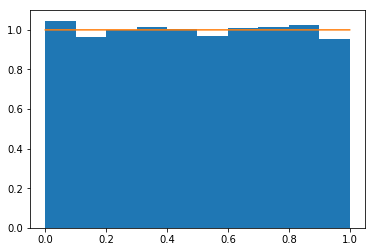

In [26]:
SIZE = 10000
loc = 0
scale = 1
xi = expon(loc=loc, scale=scale)
x1 = xi.rvs(SIZE)
x2 = xi.cdf(x1)
plt.hist(x2, density=True)
plt.plot(np.linspace(0, 1, SIZE), uniform(0, 1).pdf(np.linspace(0, 1, SIZE)))
plt.show()


Реалізуйте друге твердження про квантильне перетворення для випадкової величини $\xi \sim Exp(1)$:
- згенеруйте $n = 10000$ значень випадкової величини $\eta \sim Unif(0, 1)$;
- обчисліть функцію обернену до функції розподілу випадкової величини $\xi$;
- отримайте $n = 10000$ значень випадкової величини $F^{-1}(\eta)$;
- намалюйте нормовану гістограму отриманих $n = 10000$ значень випадкової величини $F^{-1}(\eta)$;
- намалюйте щільність випадкової величини $\xi$ на тому ж графіку.

Порівняйте форму нормованої гістограми та функції щільності.

Що відбувається при збільшенні (зменшенні) кількості випадкових значень $n$?

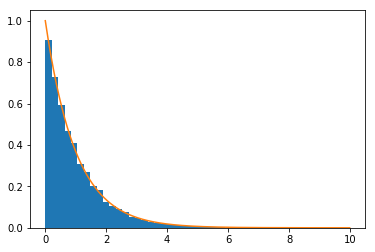

In [24]:
def rev(x):
    return -np.log(1-x)
mu = uniform()
x_mu = mu.rvs(SIZE)
x_rev = rev(x_mu)
plt.hist(x_rev, density=True, bins=40)
x = np.arange(0, 10, 0.01)
plt.plot(x, xi.pdf(x))
plt.show()

### 1.2 Квантиль

Нехай $F$ - функція розпділу деякої випадкової величини $\xi$, $\alpha \in [0, 1]$.

Квантиль рівня $\alpha$ - це таке число $x_{\alpha}$, що
$$F \left(x_{\alpha}\right) = \mathsf{P}\left(\xi < x_{\alpha}\right) = \alpha.$$

Інший варіант визначення. Нехай $Q(\alpha)$ - це квантиль рівня $\alpha$. Тоді
$$Q(\alpha) = \inf \left\{ x \in \mathbb{R} \, \colon \, \alpha < F(x) \right\}.$$

Якщо $F$ - неперервна та строго зростає, то
$$Q = F^{-1}.$$

Для розподілів із класу **scipy.stats** функція квантилю реалізована методом **ppf**.

Наприклад, для експоненційного розподілу маємо (детальна інформація в [документації](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html)):

In [98]:
from scipy.stats import expon

q = np.arange(0, 1.1, 0.1)
f_q = expon.ppf(q, loc=0, scale=1)
print(f_q)

qq = expon.cdf(f_q, loc=0, scale=1)
print(qq)

[0.         0.10536052 0.22314355 0.35667494 0.51082562 0.69314718
 0.91629073 1.2039728  1.60943791 2.30258509        inf]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


Для випадкової величини $\xi \sim Exp(1)$ застосуйте метод **ppf** до згенерованих раніше $n = 10000$ значень випадкової величини $\eta \sim Unif(0, 1)$.
Порівняйте ці значення з отриманими раніше $n = 10000$ значеннями випадкової величини $F^{-1}(\eta)$ за допомогою оберненої функції розподілу, яку Ви обчислювали.

In [105]:
print("Number of different values = {}".format(sum(f_eta_rvs != xi.ppf(eta_rvs))))
print("Number of values that differ more than 10^{} = {}".format("{-10}", sum(f_eta_rvs - xi.ppf(eta_rvs) > 10**(-10))))

Number of different values = 137
Number of values that differ more than 10^{-10} = 0


Реалізуйте друге твердження про квантильне перетворення для випадкової величини $\xi \sim Exp(1)$ з використанням вбудованого методу квантильної функції:
- візьміть згенеровані раніше $n = 10000$ значень випадкової величини $\eta \sim Unif(0, 1)$;
- отримайте $n = 10000$ значень випадкової величини $F^{-1}(\eta)$ за допомогою методу **ppf**;
- намалюйте нормовану гістограму отриманих $n = 10000$ значень випадкової величини $F^{-1}(\eta)$;
- намалюйте щільність випадкової величини $\xi$ на тому ж графіку.

Порівняйте даний графік з отриманим раніше.

In [3]:
# Місце для Вашого коду



## 2 Модуль від випадкової величини

### 2.1 Нормальний розподіл

Розглянемо випадкову величину $\xi$ зі стандартного нормального розподілу.
Тобто $\xi \sim N(0, 1)$.

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $|\xi|$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $|\xi|$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $|\xi|$.

In [4]:
# Місце для Вашого коду



### 2.2 Рівномірний розподіл

Розглянемо випадкову величину $\xi$ з рівномірного розподілу на $[-1, 4]$.
Тобто $\xi \sim Unif(-1, 4)$.

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $|\xi|$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $|\xi|$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $|\xi|$.

In [5]:
# Місце для Вашого коду



### 2.3 Експоненційний розподіл

Розглянемо випадкову величину $\xi$ зі стандартного експоненційного розподілу.
Тобто $\xi \sim Exp(1)$.

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $|\xi|$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $|\xi|$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $|\xi|$.

In [6]:
# Місце для Вашого коду



## 3 Квадрат від випадкової величини

### 3.1 Рівномірний розподіл

Розглянемо випадкову величину $\xi$ зі стандартного рівномірного розподілу.
Тобто $\xi \sim Unif(0, 1)$.

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\xi^2$ (застосуйте функцію піднесення до квадрата до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\xi^2$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi^2$.

In [7]:
# Місце для Вашого коду



### 3.2 Нормальний розподіл

Розглянемо випадкову величину $\xi$ зі стандартного нормального розподілу.
Тобто $\xi \sim N(0, 1)$.

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\xi^2$ (застосуйте функцію піднесення до квадрата до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\xi^2$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi^2$;
   - функцію щільності випадкової величини $\eta \sim \chi^2_1$;
   - функцію щільності випадкової величини $\eta \sim \Gamma(1/2, 1/2)$.

In [8]:
# Місце для Вашого коду



## 4 Відсутність пам'яті

Розглянемо випадкову величину $\xi$ зі стандартного експоненційного розподілу.
Тобто $\xi \sim Exp(1)$.

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = (\xi - 1) I_{(\xi - 1) \geq 0}$;
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$.

In [9]:
# Місце для Вашого коду



## 5 Одиничний квадрат

Реалізуйте вадкову величину рівномірно розподілену на одиничному квадраті.
Тобто $\xi = (x, y), \quad x, y \sim Unif(0, 1)$.

In [10]:
# Місце для Вашого коду



Знайдіть функцію щільності випадкової величини $\xi_1 = x + y$.
Намалюйте її разом із нормованою гістограмою випадкової величини $\xi_1$, отриманою перетвореннями в.в. $x, y$.

In [11]:
# Місце для Вашого коду



Знайдіть функцію щільності випадкової величини $\xi_2 = xy$.
Намалюйте її разом із нормованою гістограмою випадкової величини $\xi_2$, отриманою перетвореннями в.в. $x, y$.

In [12]:
# Місце для Вашого коду



Знайдіть функцію щільності випадкової величини $\xi_3 = \min (x, y)$.
Намалюйте її разом із нормованою гістограмою випадкової величини $\xi_3$, отриманою перетвореннями в.в. $x, y$.

In [13]:
# Місце для Вашого коду

